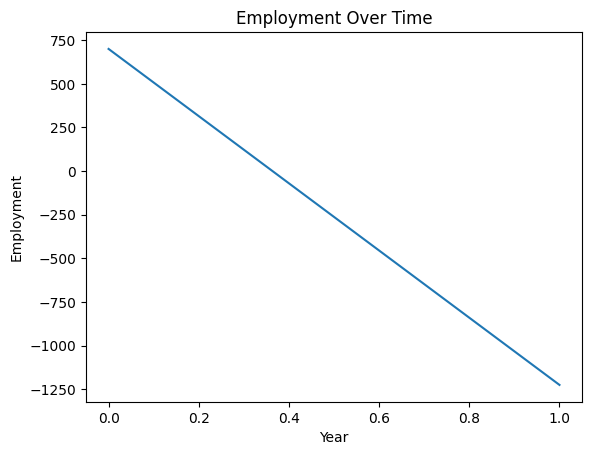

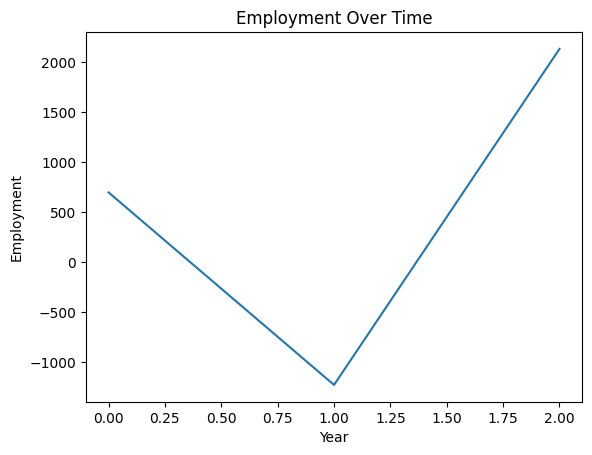

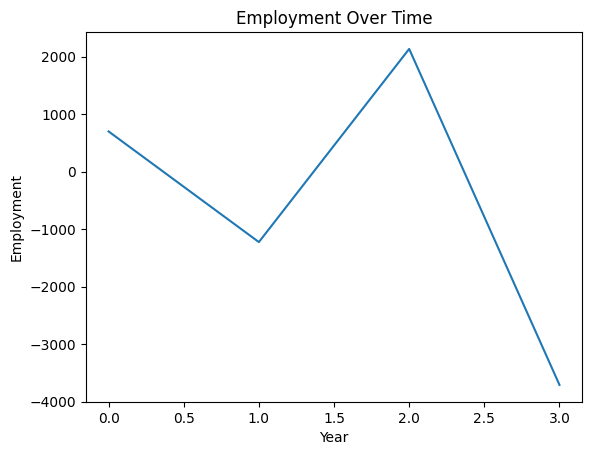

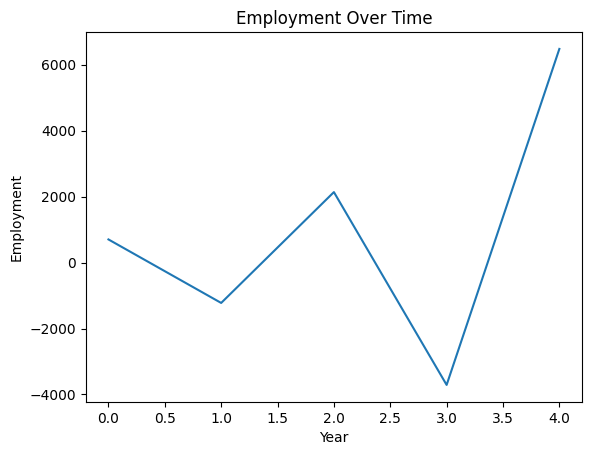

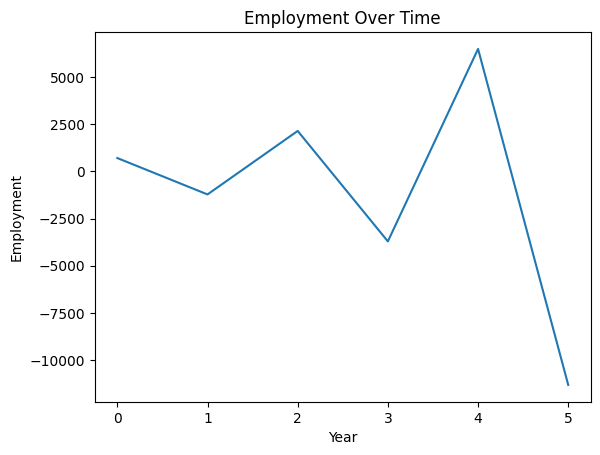

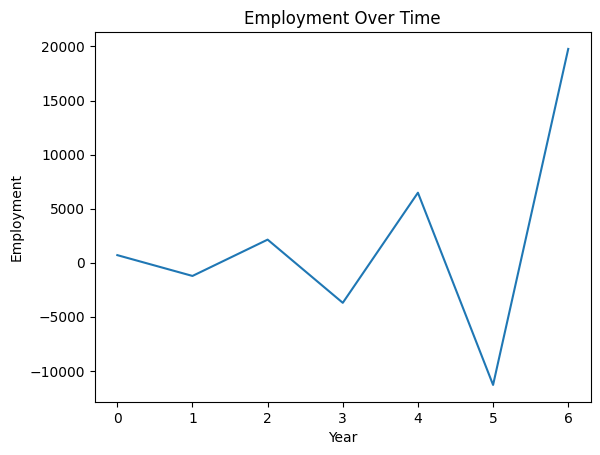

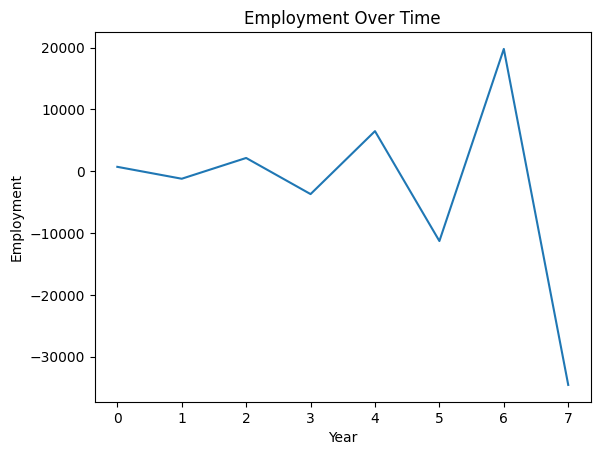

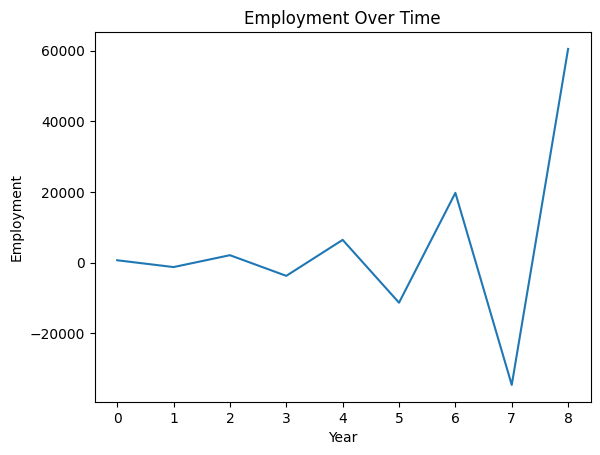

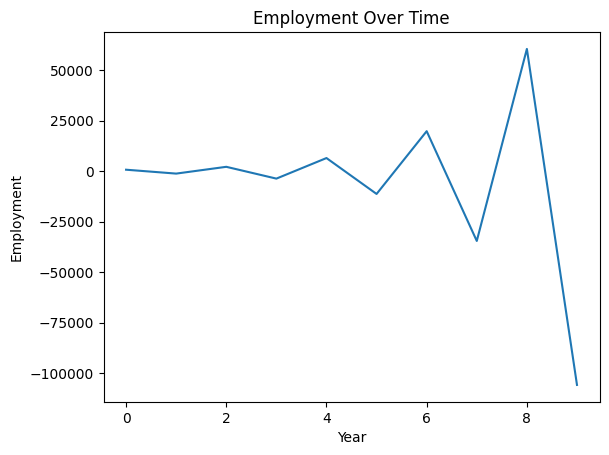

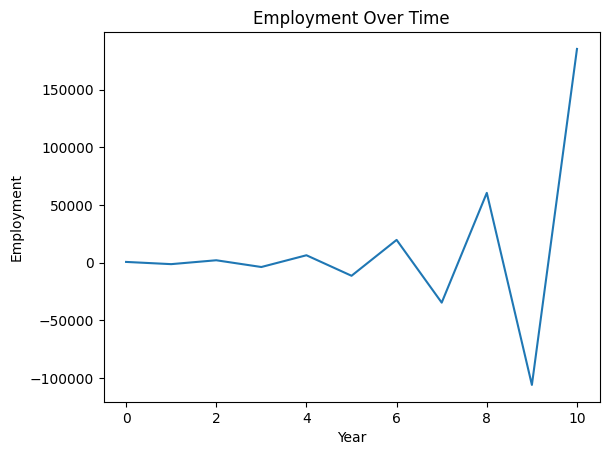

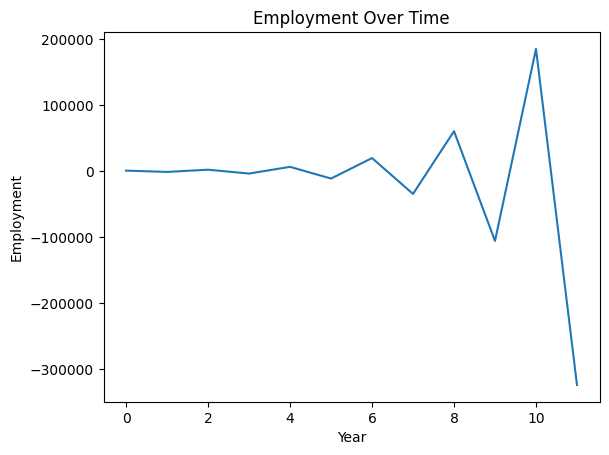

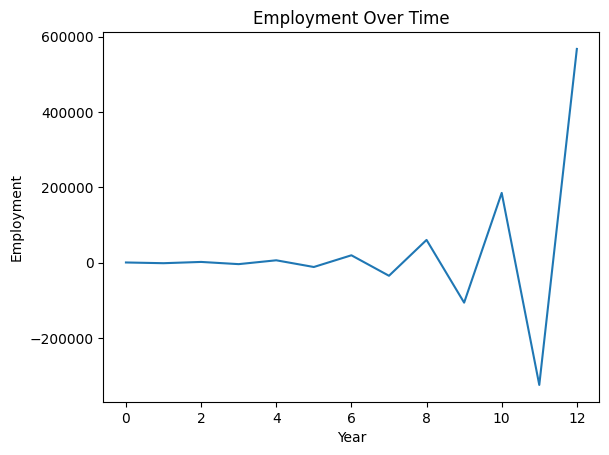

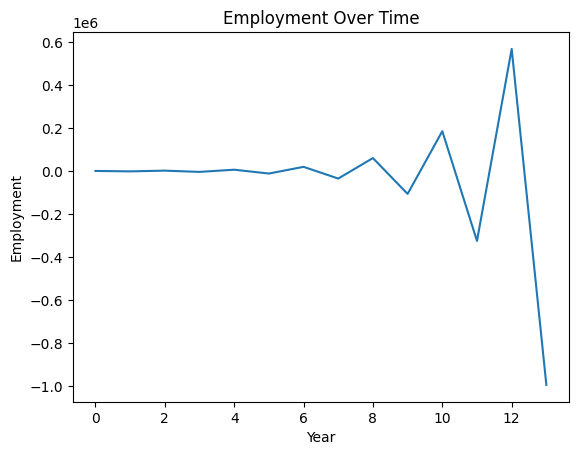

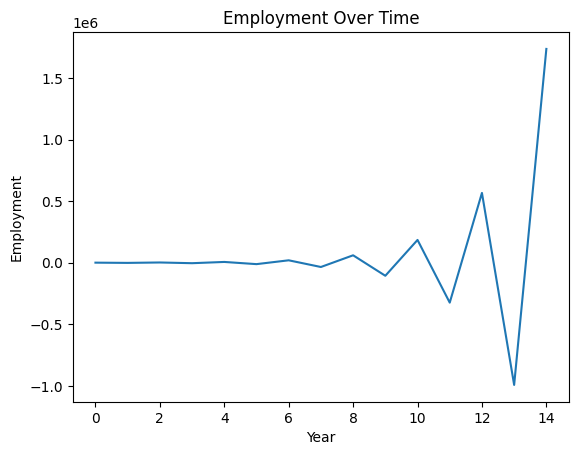

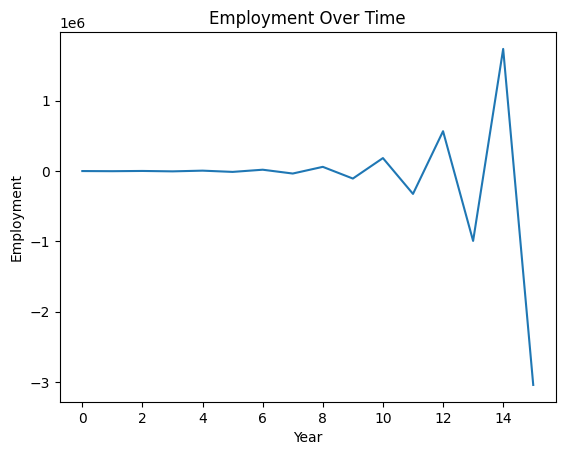

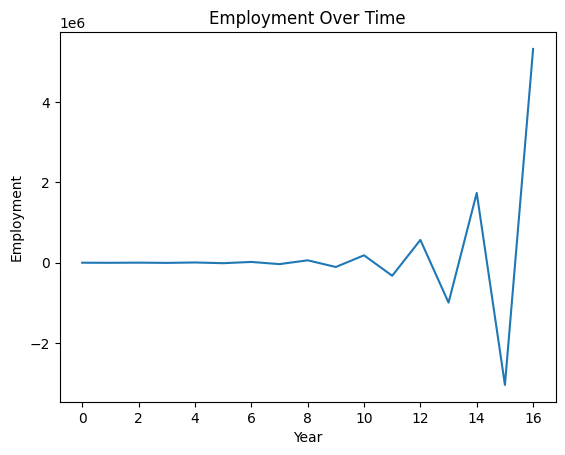

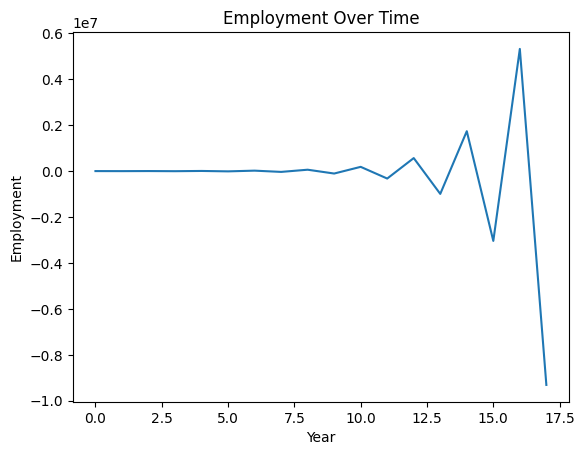

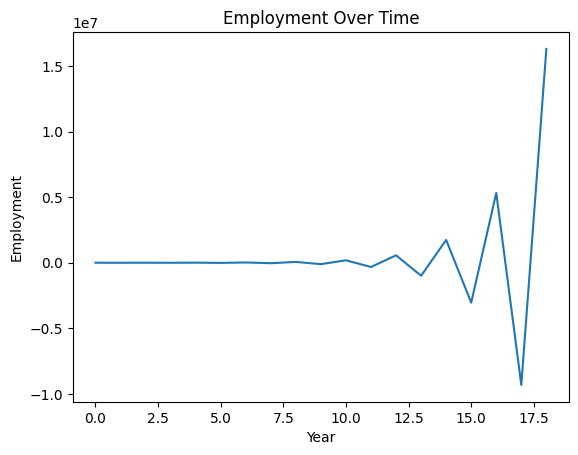

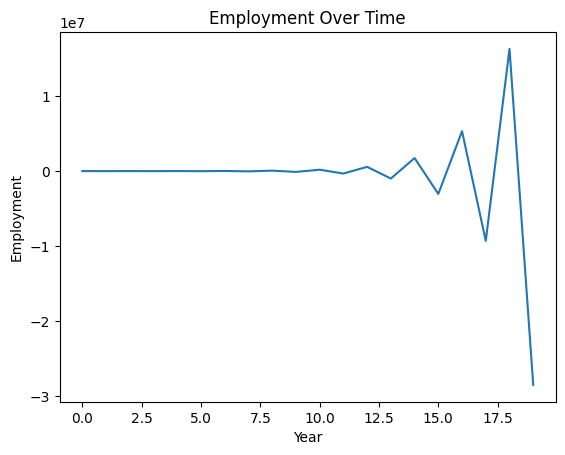

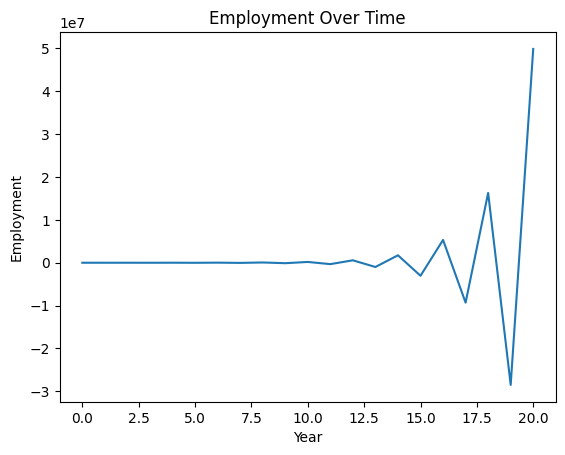

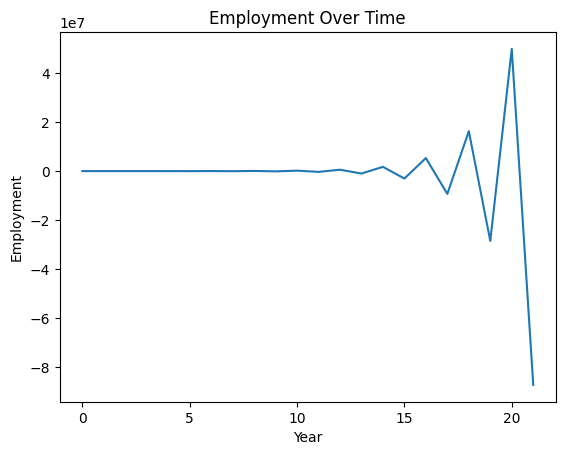

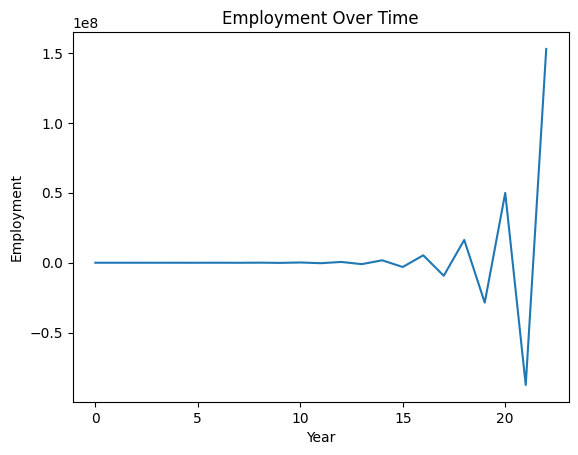

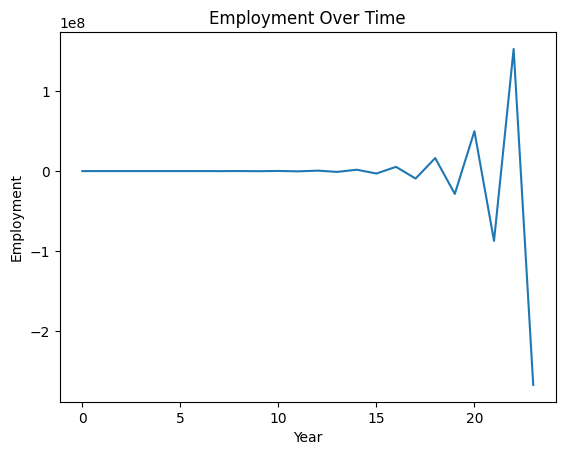

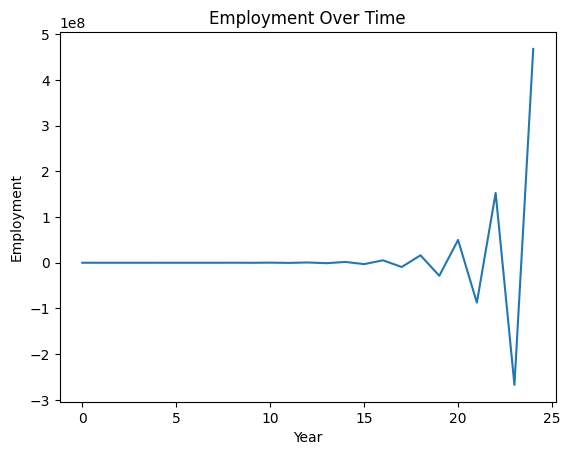

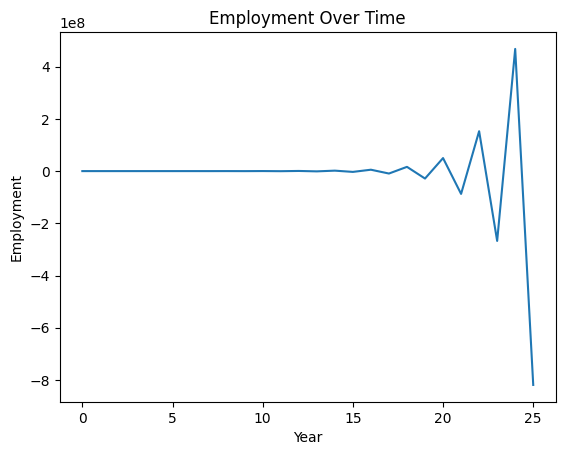

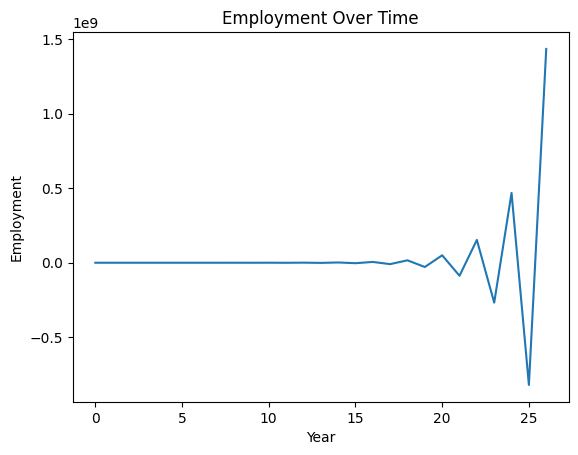

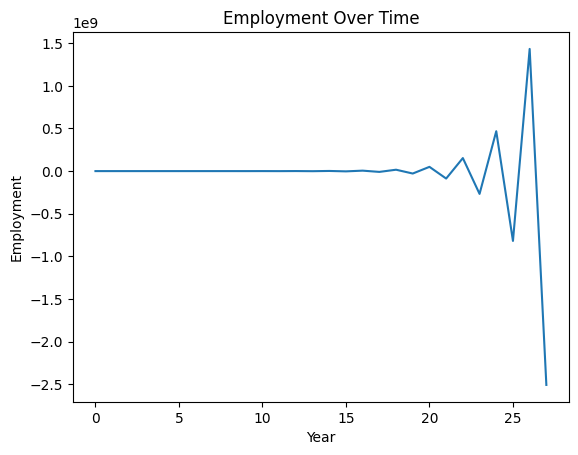

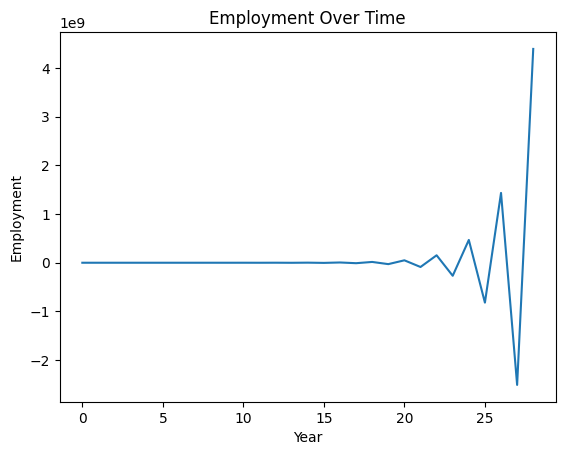

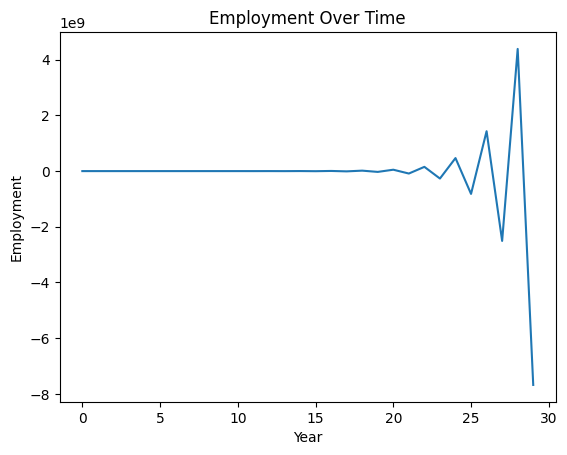

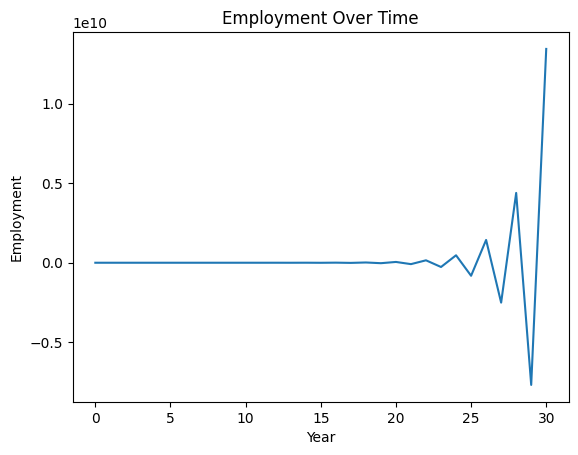

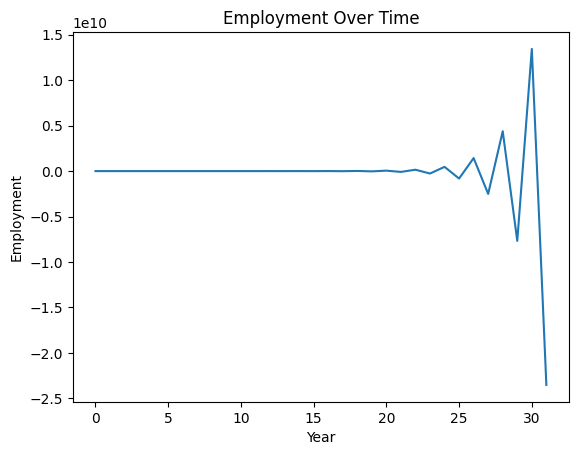

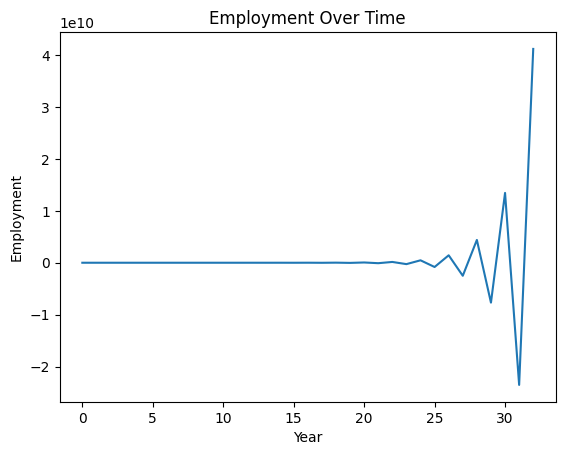

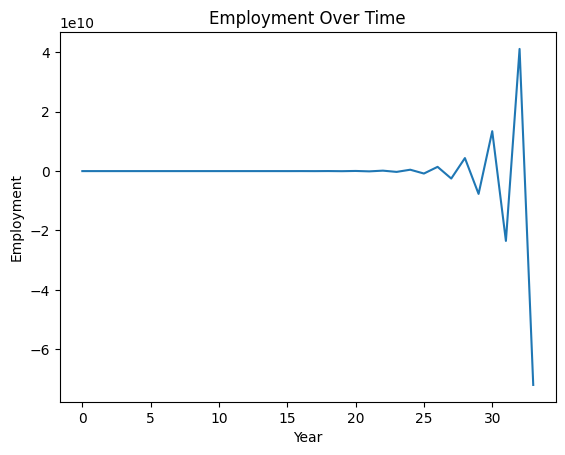

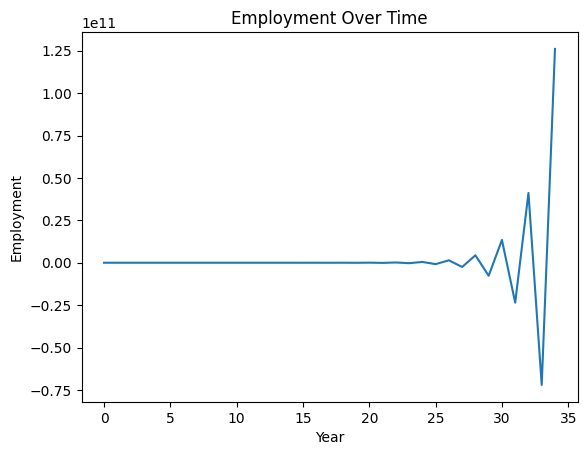

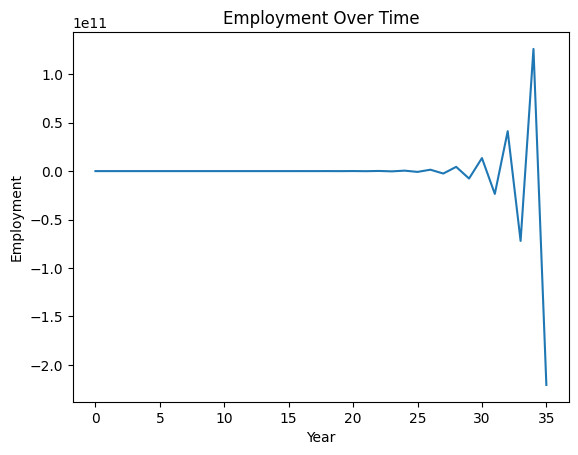

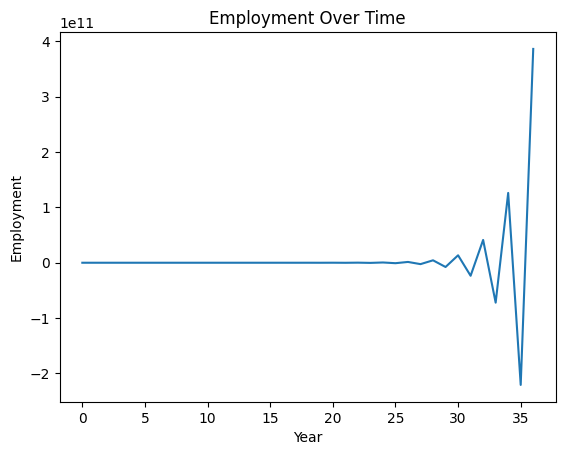

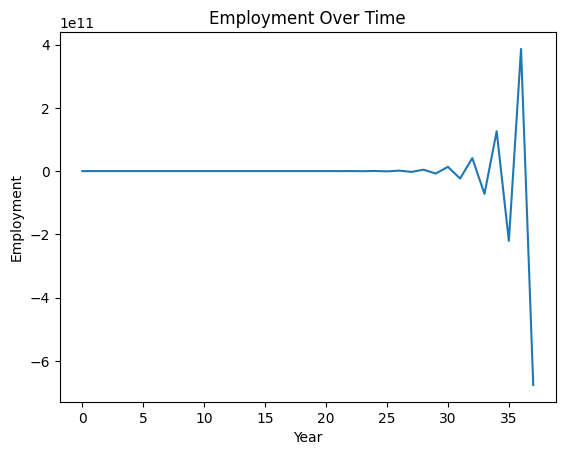

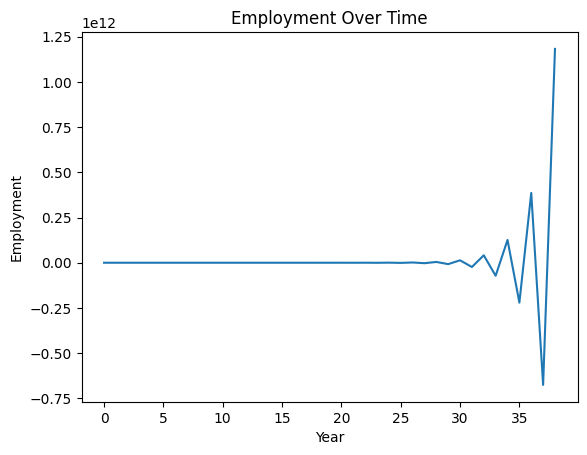

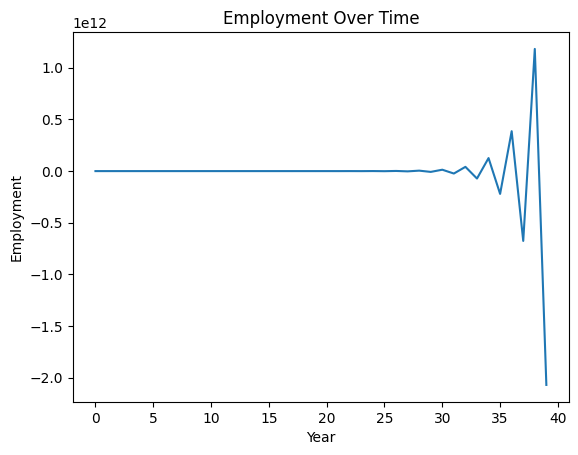

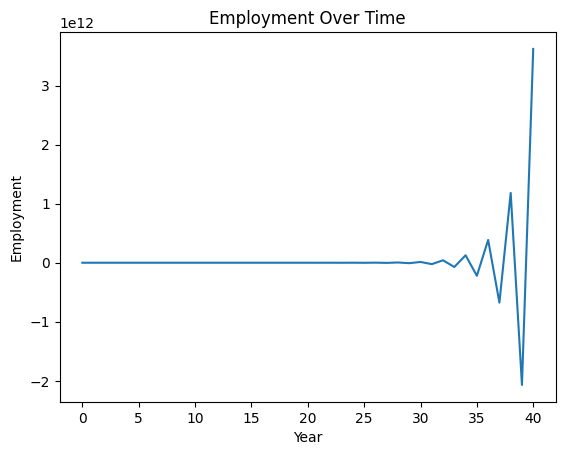

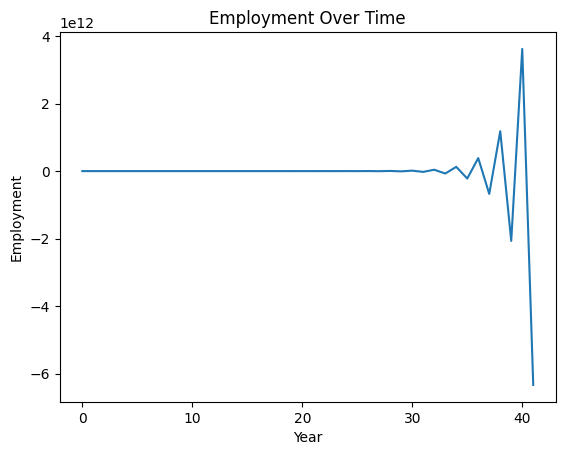

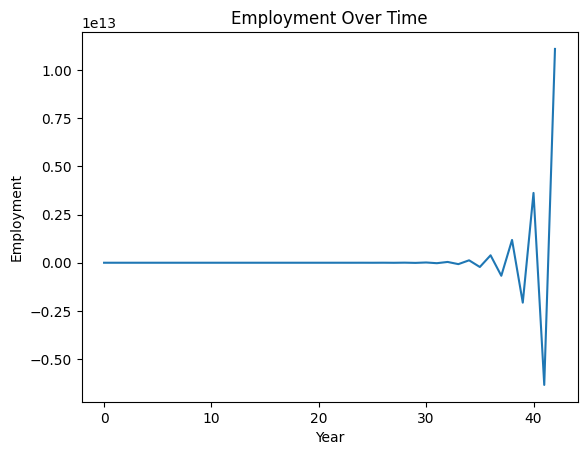

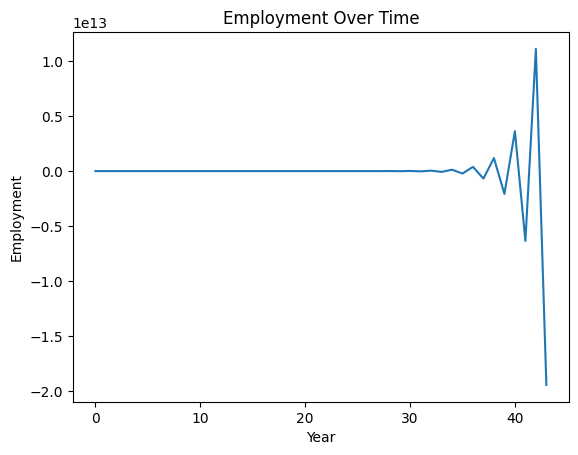

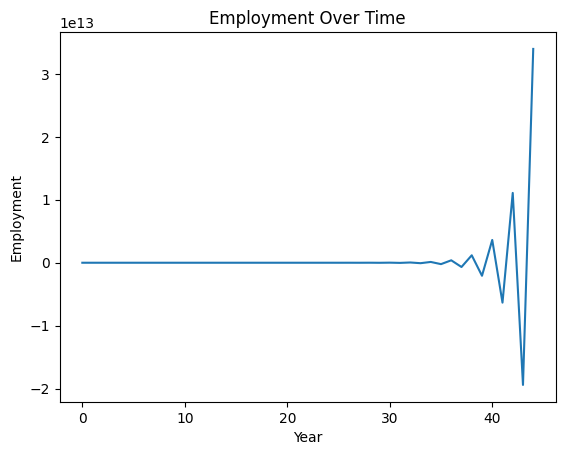

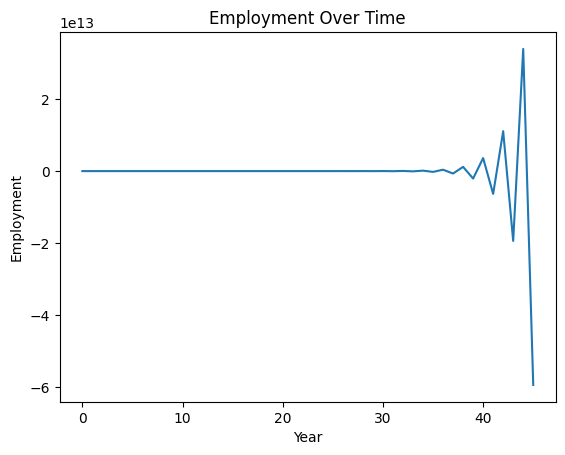

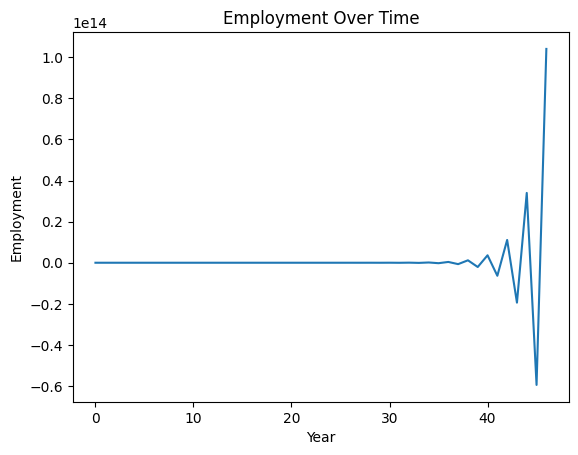

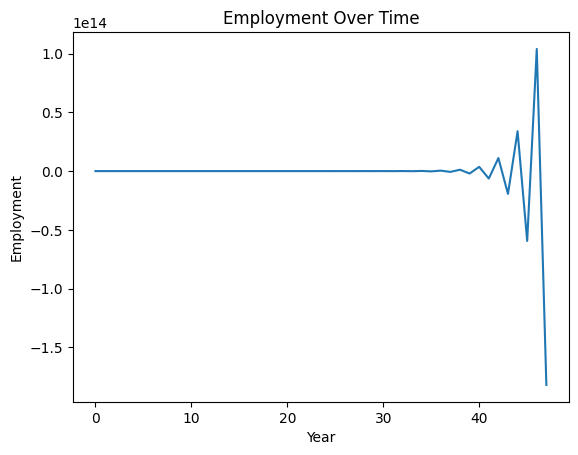

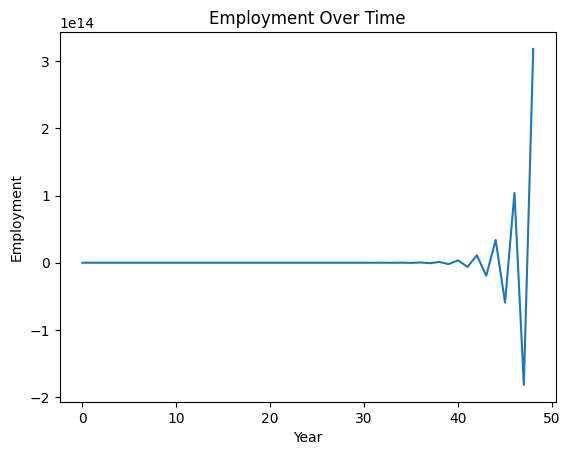

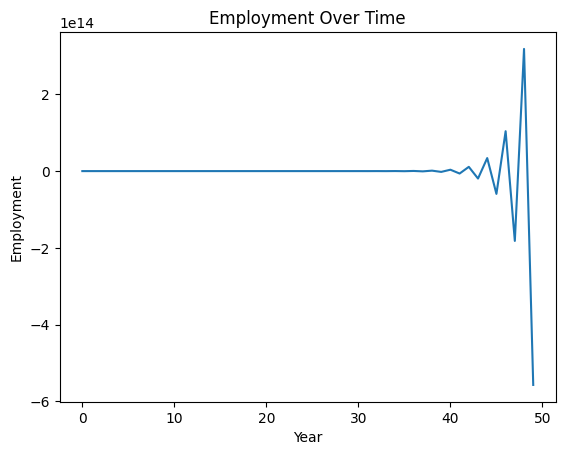

In [1]:
import random
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
birth_rate = 0.02
death_rate = 0.01
retirement_age = 65
initial_employment_rate = 0.7
unemployment_rate = 0.05

# Initialize population and employment status
population = [0] * 100  # Age distribution from 0 to 99
population[0] = initial_population

employment = [0] * simulation_years
employment[0] = int(initial_population * initial_employment_rate)

# Simulation loop
for year in range(1, simulation_years):
    new_population = [0] * 100
    new_employment = 0
    
    # Update population based on birth and death rates
    for age in range(len(population)):
        births = int(population[age] * birth_rate)
        deaths = int(population[age] * death_rate)
        new_population[age] += births - deaths
    
    # Update employment based on retirement and unemployment rates
    for age in range(retirement_age, len(population)):
        retired = population[age]
        unemployed = int(employment[year-1] * unemployment_rate)
        new_population[age] += retired
        new_employment -= retired
        new_employment -= unemployed
    
    # Update employment for new entrants to the labor force
    new_employment += int(new_population[retirement_age-1] * (1 - unemployment_rate))
    
    population = new_population
    employment[year] = new_employment
    
    # Plot employment data
    plt.plot(employment[:year+1])
    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.show()


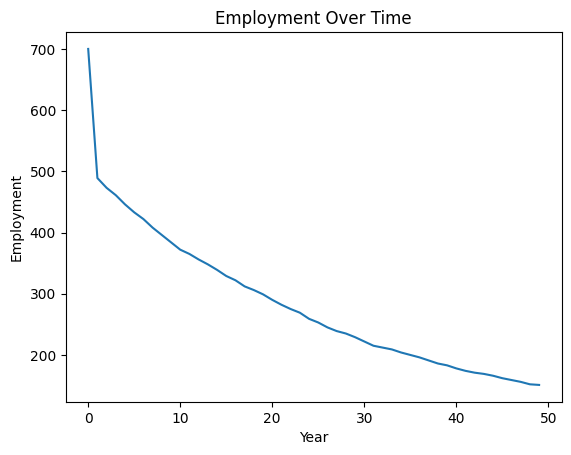

In [1]:
import random
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
birth_rate = 0.02
death_rate = 0.01
retirement_age = 65
initial_employment_rate = 0.7
unemployment_rate = 0.05

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize population
population = []
for _ in range(initial_population):
    employed = random.random() < initial_employment_rate
    person = Person(age=0, employed=employed)
    population.append(person)

# Initialize employment data
employment = [initial_population * initial_employment_rate]

# Simulation loop
for year in range(1, simulation_years):
    retired_population = 0
    unemployed_population = 0
    new_employment = 0
    
    for person in population:
        person.update_age()
        
        if person.is_retired():
            retired_population += 1
        
        if person.is_unemployed():
            unemployed_population += 1
        
        if person.is_employed():
            new_employment += 1
    
    # Update population based on birth and death rates
    births = int(len(population) * birth_rate)
    deaths = int(len(population) * death_rate)
    population += [Person(age=0, employed=False) for _ in range(births)]
    population = random.sample(population, len(population) - deaths)
    
    # Update employment based on retirement and unemployment rates
    retired_employment = int(new_employment * retired_population / len(population))
    unemployed_employment = int(new_employment * unemployed_population / len(population))
    new_employment -= retired_employment
    new_employment -= unemployed_employment
    
    # Update employment for new entrants to the labor force
    new_employment += int(births * (1 - unemployment_rate))
    
    employment.append(new_employment)
    
# Plot employment data
plt.plot(employment)
plt.title("Employment Over Time")
plt.xlabel("Year")
plt.ylabel("Employment")
plt.show()



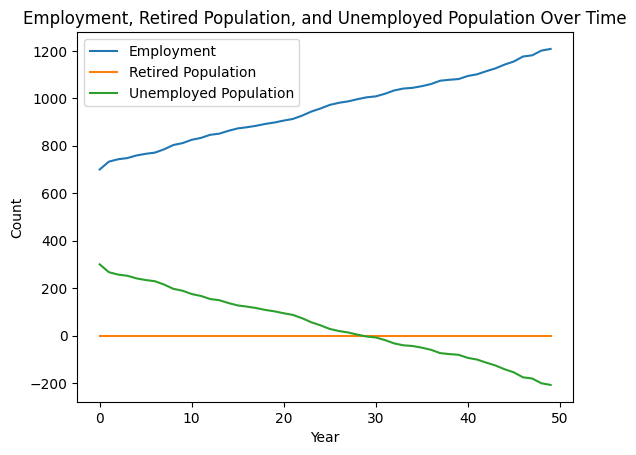

In [16]:
import random
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
birth_rate = 0.02
death_rate = 0.01
retirement_age = 65
initial_employment_rate = 0.7
unemployment_rate = 0.05

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize population
population = []
for _ in range(initial_population):
    employed = random.random() < initial_employment_rate
    person = Person(age=0, employed=employed)
    population.append(person)

# Initialize employment and retired population data
employment = [initial_population * initial_employment_rate]
retired_population = [0]

unem_rate = [unemployment_rate]

# Simulation loop
for year in range(1, simulation_years):
    new_population = []
    new_employment = 0
    retired_this_year = 0
    unemployed_this_year = 0
    
    for person in population:
        person.update_age()
        
        if person.is_retired():
            retired_this_year += 1
        
        if person.is_unemployed():
            if random.random() < unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
        
        if person.is_employed():
            new_employment += 1
        
        new_population.append(person)
    
    # Update population based on birth and death rates
    births = int(len(population) * birth_rate)
    deaths = int(len(population) * death_rate)
    new_population += [Person(age=0, employed=False) for _ in range(births)]
    new_population = random.sample(new_population, len(new_population) - deaths)
    
    # Update employment and retired population data
    new_employment += births
    new_employment -= retired_this_year
    retired_population.append(retired_this_year)
    
    population = new_population
    employment.append(new_employment)
    unem_rate.append(unemployment / (len(employment) + unemployment))

# Plot employment, retired population, and unemployed population data
years = list(range(simulation_years))
plt.plot(years, employment, label="Employment")
plt.plot(years, retired_population, label="Retired Population")
plt.plot(years, [initial_population - e for e in employment], label="Unemployed Population")
plt.title("Employment, Retired Population, and Unemployed Population Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()


In [5]:
import random
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
birth_rate = 0.02
death_rate = 0.01
retirement_age = 65
initial_employment_rate = 0.7
unemployment_rate = 0.05

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed
    

# Initialize population
population = []
for _ in range(initial_population):
    employed = random.random() < initial_employment_rate
    person = Person(age=0, employed=employed)
    population.append(person)

# Initialize employment and retired population data
employment = [initial_population * initial_employment_rate]
retired_population = [0]

unem_rate = [unemployment_rate]

#retired_population
employment
#len(population)

[700.0]